#### Logistic Regression

Making necessary imports.

In [15]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

Reading and previewing the data.

<IPython.core.display.Javascript object>


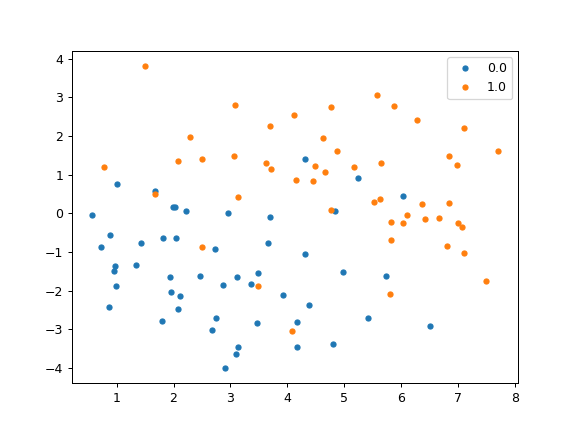

In [16]:
data = pd.concat([pd.read_table('q2x.dat', names = ['x1','x2'],delim_whitespace=True),pd.read_table('q2y.dat', names = ['y'])], axis=1)

groups = data.groupby('y')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.x1, group.x2, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()


Cool.

Like before, preprocessing input and adding a dimension.

In [17]:
inputs = data.values[:,0:2]
targets = data.values[:,2:3]

#Normalisation of input and output

inputs_mean = np.mean(inputs, axis=0)
inputs_std = np.std(inputs,axis=0)
inputs = (inputs - inputs_mean)/(inputs_std + np.finfo(float).eps)
inputs = np.concatenate((np.ones((inputs.shape[0],1)),inputs),axis=1)

Defining functions for logistic regression.

In [39]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

# Apply sigmoid over an array
def map_sigmoid(v):
    ret = np.empty_like(v)
    for j in range(0,v.shape[0]):
        ret[j][0] = sigmoid(v[j][0])
    return ret

# Gradient of NLL Loss
def dnll_dtheta(inputs,targets,weights):
    h_theta_x = map_sigmoid( np.dot(inputs,weights))
    return inputs.T.dot((h_theta_x - targets))

def hessian(inputs,targets,weights):
    h_theta_x = map_sigmoid(np.dot(inputs,weights))
    D = np.diag(np.multiply(np.ones_like(h_theta_x) - h_theta_x, h_theta_x)[:,0])
    return inputs.T.dot(D).dot(inputs)

In [44]:
def logreg_loop(stopping_df_dx):
    weights = np.zeros((inputs.shape[1],1))
    while True:
        df_dx = dnll_dtheta(inputs, targets, weights)
        d2f_dx2 = hessian(inputs, targets, weights)
        grad = np.linalg.inv(d2f_dx2).dot(df_dx)
        weights = weights - grad
        if (np.linalg.norm(grad) < stopping_df_dx):
            break

    print ('Line: 0 =' , weights[0][0], '+', weights[1][0], 'x1 +', weights[2][0], 'x2.')
    print('Stopping Criteria: Hinv df_dx <', stopping_df_dx)

    return weights

In [45]:
weights = logreg_loop(stopping_df_dx=1e-2)

Line: 0 = -0.0471755408243 + 1.46005784695 x1 + 2.06585913797 x2.
Stopping Criteria: Hinv df_dx < 0.01


OK. Let's plot this.

<IPython.core.display.Javascript object>


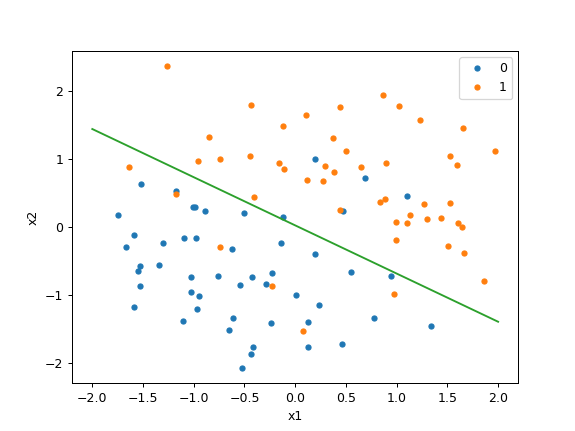

In [46]:
x = np.linspace(-2,2)
y = (weights[0][0] + weights[1][0]*x)/(-weights[2][0])

fig, ax = plt.subplots()

ax.plot(inputs[:,1][[k for k in range(0,50)]], inputs[:,2][[k for k in range(0,50)]], marker='o', linestyle='', ms=4, label='0')
ax.plot(inputs[:,1][[k for k in range(50,99)]], inputs[:,2][[k for k in range(50,99)]], marker='o', linestyle='', ms=4, label='1')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
ax.plot(x,y)
plt.show()

Interestingly, we see that using Newton's method leads to very fast convergence with a much higher learning rate compared to normal SGD.